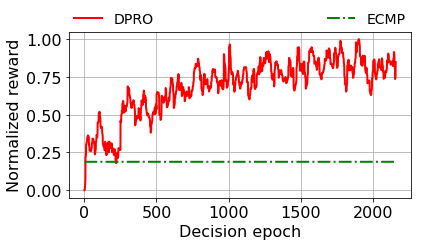

In [38]:
#reward.pdf
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib
from scipy import interpolate,log
from scipy.optimize import curve_fit

def MaxMinNormalization(x,Max,Min):
    if Max==Min:
        return float(x)
    x=(x-Min)/float(Max-Min)
    return x
        
with open("flow_ppo_load_1.2_reset","r") as f:
    a=[float(x) for x in f.read().strip().split(" ")]

m_max=np.max(a)
m_min=np.min(a)
a=[MaxMinNormalization(x,m_max,m_min) for x in a]
b=MaxMinNormalization(-0.884463,m_max,m_min)

font = {'size':16}
matplotlib.rc('font',**font)
plt.figure(figsize=(6, 6*0.618))

x=[i for i in range(len(a))]
plt.plot(x,a,color="red",label="DPRO",linewidth=2)
plt.plot(x,[b]*len(a),color="green",label="ECMP",linewidth=2,ls='-.')
plt.grid(True)
plt.xlabel("Decision epoch",fontsize=16)
plt.ylabel("Normalized reward",fontsize=16)
plt.legend(bbox_to_anchor=(0, 1.0, 1.0, 1.1), loc=3, ncol=2, mode="expand", borderaxespad=0, fontsize=14, frameon=False)
plt.tight_layout()
plt.savefig('pic/reward.pdf', format='pdf' ,dpi=1000)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


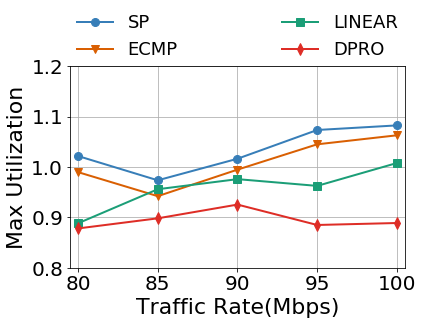

In [30]:
#reward-with-back.pdf
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

X=np.array([1,2,3,4,5])

# 图片大小
width = 6
high = width*0.618
fig_size = [width, high]

# 创建fig
fig, ax = plt.subplots(figsize=fig_size)

# 设置x，y轴的上下限
ax.set_xlim(0.9,5.1)


# fig加上背景线,背景线和xy轴上的记号位置对应
ax.grid(True)

ticks_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ticks_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ax.set_xticks([1,2,3,4,5]) 
ax.set_xticklabels(('80', '85', '90','95','100'), fontdict=ticks_font_x)
ax.set_yticks([0.8,0.9,1.0,1.1,1.2])
ax.set_yticklabels(("0.8", "0.9", "1.0", "1.1", "1.2"), fontdict=ticks_font_y)

# 设置x，y轴名称标签
label_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22}
label_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22} 
ax.set_xlabel(xlabel="Traffic Rate(Mbps)", fontdict=label_font_x)
ax.set_ylabel(ylabel="Max Utilization", fontdict=label_font_y)

#with background traffic
ax.set_ylim(0.8, 1.2)
sp_1_2=[1.0217940000000003,0.9736299999999998,1.016426,1.0734719999999998,1.0825859999999998]
ppo_1_2=[0.878103,0.898174,0.9254569999999995,0.884977,0.888876]
ecmp_1_2=[0.9898419999999986,0.9421599999999986,0.9947930000000005,1.0450499999999996,1.0629359999999999]
linear_1_2=[0.8883540000000001,0.9559230000000007,0.9759359999999995,0.962539,1.0079459999999996]

ax.plot(X, sp_1_2, color='#377eb8', linestyle='-', linewidth=2, marker='o', markersize=8, label='SP')
ax.plot(X, ecmp_1_2, color='#d95f02', linestyle='-', linewidth=2, marker='v', markersize=8, label='ECMP')
ax.plot(X, linear_1_2, color='#1b9e77', linestyle='-', linewidth=2, marker='s', markersize=8, label='LINEAR')
ax.plot(X, ppo_1_2, color='#de2d26', linestyle='-', linewidth=2, marker='d', markersize=8, label='DPRO')

ax.legend(bbox_to_anchor=(0, 1.0, 1.0, 1.1), loc=3, ncol=2, mode="expand", borderaxespad=0, fontsize=18, frameon=False)

plt.savefig('pic/reward-with-back.pdf', format='pdf' ,dpi=1000,bbox_inches="tight")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


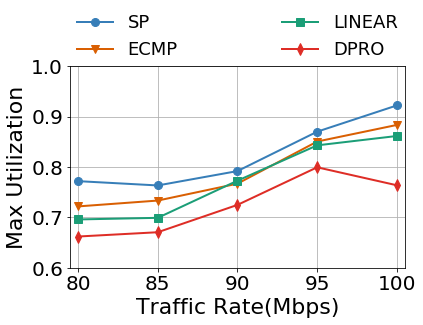

In [32]:
#reward-without-back.pdf
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

X=np.array([1,2,3,4,5])

# 图片大小
width = 6
high = width*0.618
fig_size = [width, high]

# 创建fig
fig, ax = plt.subplots(figsize=fig_size)

# 设置x，y轴的上下限
ax.set_xlim(0.9,5.1)


# fig加上背景线,背景线和xy轴上的记号位置对应
ax.grid(True)

ticks_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ticks_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ax.set_xticks([1,2,3,4,5]) 
ax.set_xticklabels(('80', '85', '90','95','100'), fontdict=ticks_font_x)
ax.set_yticks([0.6 ,0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels(("0.6", "0.7", "0.8", "0.9", "1.0"), fontdict=ticks_font_y)

# 设置x，y轴名称标签
label_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22}
label_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22} 
ax.set_xlabel(xlabel="Traffic Rate(Mbps)", fontdict=label_font_x)
ax.set_ylabel(ylabel="Max Utilization", fontdict=label_font_y)

#no background traffic
ax.set_ylim(0.6, 1.0)
linear_1_2=[0.6959650000000006,0.6991639999999988,0.7729059999999999,0.843007,0.8615839999999997]
ppo_1_2=[0.6620610000000005,0.6705810000000001,0.7248339999999998,0.7994370000000006,0.7637409999999989]
ecmp_1_2=[0.7218269999999993,0.7334309999999999,0.7669969999999993,0.8505790000000002,0.8835110000000002]
sp_1_2=[0.771961,0.7634170000000007,0.7919509999999996,0.8701490000000001,0.9222580000000002]

ax.plot(X, sp_1_2, color='#377eb8', linestyle='-', linewidth=2, marker='o', markersize=8, label='SP')
ax.plot(X, ecmp_1_2, color='#d95f02', linestyle='-', linewidth=2, marker='v', markersize=8, label='ECMP')
ax.plot(X, linear_1_2, color='#1b9e77', linestyle='-', linewidth=2, marker='s', markersize=8, label='LINEAR')
ax.plot(X, ppo_1_2, color='#de2d26', linestyle='-', linewidth=2, marker='d', markersize=8, label='DPRO')

ax.legend(bbox_to_anchor=(0, 1.0, 1.0, 1.1), loc=3, ncol=2, mode="expand", borderaxespad=0, fontsize=18, frameon=False)

plt.savefig('pic/reward-without-back.pdf', format='pdf' ,dpi=1000,bbox_inches="tight")